In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
data = pd.read_csv('data/train.txt', header=None)

In [49]:
X = data.iloc[:,:-1]
m = X.shape[0]
print("shape:", X.shape)
print(type(X))

shape: (100, 2)
<class 'pandas.core.frame.DataFrame'>


In [50]:
y = data.iloc[:,2]
y.shape

(100,)

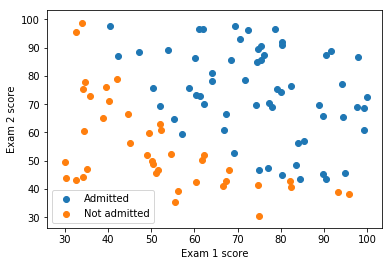

In [51]:
mask = y == 1
adm = plt.scatter(X[mask][0].values, X[mask][1].values)
not_adm = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [52]:
X[mask][0].values

array([60.18259939, 79.03273605, 61.10666454, 75.02474557, 76.0987867 ,
       84.43281996, 82.30705337, 69.36458876, 53.97105215, 69.07014406,
       70.66150955, 76.97878373, 89.67677575, 77.92409145, 62.27101367,
       80.19018075, 61.37928945, 85.40451939, 52.04540477, 64.17698887,
       83.90239366, 94.44336777, 77.19303493, 97.77159928, 62.0730638 ,
       91.5649745 , 79.94481794, 99.27252693, 90.54671411, 97.64563396,
       74.24869137, 71.79646206, 75.39561147, 40.45755098, 80.27957401,
       66.74671857, 64.03932042, 72.34649423, 60.45788574, 58.84095622,
       99.8278578 , 47.26426911, 50.4581598 , 88.91389642, 94.83450672,
       67.31925747, 57.23870632, 80.366756  , 68.46852179, 75.47770201,
       78.63542435, 94.09433113, 90.44855097, 74.49269242, 89.84580671,
       83.48916274, 42.26170081, 99.31500881, 55.34001756, 74.775893  ])

In [53]:
X = np.hstack((np.ones((m,1)),X))
n = X.shape[1]
print(X.shape)
y = pd.DataFrame(y)
assert(X.shape == (100,3))

(100, 3)


In [55]:
y.shape

(100, 1)

# Functions

In [56]:
def noramlise(X):
    mean = np.mean(X, axis=0)
    stdd = np.std(X, axis=0)
    X = (X - mean) / stdd
    return X

In [57]:
def sigmoid(z):
    return 1 / (1 + np.exp(z))

In [58]:
def computeCost(theta, X, y):
    m = X.shape[0]
    z = np.dot(X,theta)
    h = sigmoid(z)
    J = np.sum(y * np.log(h) + (1-y) * np.log(1-h), axis=0)
    J = J / -m
    return J

In [59]:
def gradientDescent(theta, X, y):
    m = X.shape[0]
    n = X.shape[1]
    h = sigmoid(np.dot(X,theta))
    d = h - y
    dt = np.dot(X.T,d)
    dt = dt / m
    return dt

# Training

In [9]:
theta = np.zeros((n,1))
print("initial theta:\n",theta)
print("initial theta shape:", theta.shape)

initial theta:
 [[0.]
 [0.]
 [0.]]
initial theta shape: (3, 1)


In [17]:
finalTheta = opt.fmin_tnc(func = computeCost, x0 = theta.flatten(), fprime = gradient, args = (X, y.flatten()))[0]

In [18]:
J = computeCost(finalTheta[:,np.newaxis], X, y)

In [19]:
J

array([0.69314718])

In [33]:
testTheta = np.array([[-24.0],[0.20],[0.20]])
print(testTheta)

[[-24. ]
 [  0.2]
 [  0.2]]


In [34]:
grad = gradient(testTheta, X, y)

In [35]:
grad

array([[ -0.24290299],
       [-26.58466729],
       [-25.17248178]])

In [39]:
computeCost(testTheta, X, y)

array([4.72715371])

In [37]:
computeCost(theta, X, y)

array([0.69314718])

In [38]:
gradient(theta, X, y)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])